<a href="https://colab.research.google.com/github/sakshid2706/Digit_Recognition/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Project is based on the deep learning ie the training of nueral networks.I have used the famous MNIST dataset. This dataset contains handwritten digits with labels which we use to train our model.



In [ ]:
# importing the libraries
'''Tensorflow helps to make our work of testing and training easier because of
the in built methods in it.'''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset
digits=tf.keras.datasets.mnist
#the data is  already divided in train and test dataset. We are assignning names to the groups
(train_digits, train_labels),(test_digits,test_labels)=digits.load_data()

In [ ]:
#checking the version of tensorflow
print(tf.__version__)

2.8.2


In [ ]:
#checking the shape.

print(train_digits.shape)
print(train_labels.shape)

print(test_digits.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# the labeled data array
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

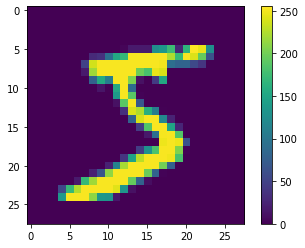

In [ ]:
# displaying the image of the digits at 0th index
plt.figure()
plt.imshow(train_digits[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# pixel values range from 0-255 
# we scale it down to 0-1 since it is  
train_digits=train_digits/255
test_digits=test_digits/255

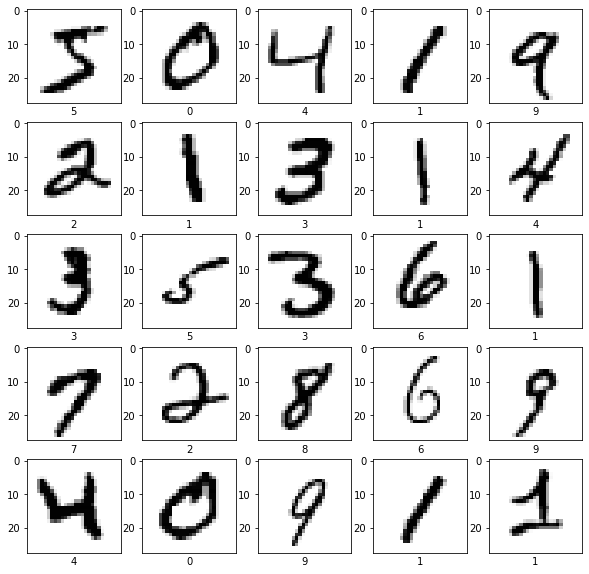

In [ ]:
#class_names=[]
# plotting the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_digits[i], cmap=plt.cm.binary)
  plt.xticks([])
  plt.xticks([])
  #plt.grid(False)
  plt.xlabel(train_labels[i])
plt.show()

Building the model.

Flatten helps to make a 1-D array of the images
The activation function used here is relu
Activation function are used to help the nueral network learn complex patterns in data.
ReLU: ReLU (Rectified Linear Unit) is defined as f(x) = max(0,x)
It helps to build a non-linear equation to which helps in learning complex pattern
If we would have used a KNN model on the same dataset, we would end up getting a lesser accuracy.This is why we need a to train a nueral network on the model

In [ ]:
# model training
# flatten helps to make a 1 d array of the images
mod=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(112,activation='relu'),
    tf.keras.layers.Dense(10)
]
)

In [ ]:
# compiling the model with the optiizer SGD
#logits are the input to the softmax layer(softmax layer helps in giving the output between 0 to 1 )
#the loss function checks the difference in expected o/p and the actual o/p
mod.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']

)

In [ ]:
#training
mod.fit(train_digits,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6759 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.9057
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.9183
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9277
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2343 - accuracy: 0.9344
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2160 - accuracy: 0.9393
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2001 - accuracy: 0.9437
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1868 - accuracy: 0.9474
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1753 - accuracy: 0.9504
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.165

In [ ]:
# checking the accuracy of the test case
test_loss, test_accu=mod.evaluate(test_digits,test_labels,verbose=2)
print('\n Test accuracy=',test_accu)

313/313 - 1s - loss: 0.1645 - accuracy: 0.9524 - 501ms/epoch - 2ms/step

 Test accuracy= 0.9524000287055969


In [ ]:
###### prediction model

In [ ]:
# added a softmax layer since we want the output to e in between 0 to 1(we need to see the output between this values to analyse better)
#earlier we did logits=True since the SparseCategoricalCrossentropy requires the input to be in betwee 0 to 1
prob_mod=tf.keras.Sequential([mod,
                              tf.keras.layers.Softmax()
                              ])

In [ ]:
predictions=prob_mod.predict(test_digits)

In [ ]:
predictions[0]

array([1.6043992e-05, 2.2233574e-07, 3.1678390e-04, 2.3896659e-03,
       3.1682299e-07, 3.9577393e-05, 5.3740097e-09, 9.9709868e-01,
       9.2584487e-06, 1.2946421e-04], dtype=float32)

9


9

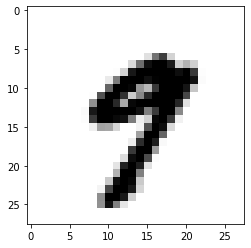

In [ ]:
#predicting the value for the 20th dataset and checking it with the label
print(test_labels[20])
plt.imshow(test_digits[20],cmap=plt.cm.binary)
np.argmax(predictions[20])